# Visualize one episode of LeRobot Dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
dataset_dir = "/home/finn/phosphobot/recordings/lerobot_v2.1/ur-1/data/chunk-000/episode_000000.parquet"

# chunk is parquet file

# read parquet file
df = pd.read_parquet(dataset_dir)

print(f"df.head(): \n{df.head()}")
print(f"\n\ndf.columns: \n{df.columns}")

df.head(): 
                                              action  \
0  [0.09050938487052917, -1.5499447584152222, 1.8...   
1  [0.09050899744033813, -1.5499048233032227, 1.8...   
2  [0.09070105105638504, -1.5500413179397583, 1.8...   
3  [0.09112847596406937, -1.5499683618545532, 1.8...   
4  [0.09152324497699738, -1.5500404834747314, 1.8...   

                                   observation.state  timestamp  task_index  \
0  [0.0905374139547348, -1.5499483346939087, 1.80...   0.000000           0   
1  [0.09050938487052917, -1.5499447584152222, 1.8...   0.033333           0   
2  [0.09050899744033813, -1.5499048233032227, 1.8...   0.066667           0   
3  [0.09070105105638504, -1.5500413179397583, 1.8...   0.100000           0   
4  [0.09112847596406937, -1.5499683618545532, 1.8...   0.133333           0   

   episode_index  frame_index  index  
0              0            0      0  
1              0            1      1  
2              0            2      2  
3              0    

In [60]:
observation_state = df.loc[:, "observation.state"]
print(f"observation_state.head(): \n{observation_state.head()}")

observation_state.head(): 
0    [0.0905374139547348, -1.5499483346939087, 1.80...
1    [0.09050938487052917, -1.5499447584152222, 1.8...
2    [0.09050899744033813, -1.5499048233032227, 1.8...
3    [0.09070105105638504, -1.5500413179397583, 1.8...
4    [0.09112847596406937, -1.5499683618545532, 1.8...
Name: observation.state, dtype: object


In [61]:
print(observation_state.shape)

(540,)


In [62]:
print(observation_state.iloc[0])
print(type(observation_state.iloc[0]))

[ 0.09053741 -1.54994833  1.80317914 -1.99806988 -1.41814697 -1.28378284
  0.01176471]
<class 'numpy.ndarray'>


In [63]:
# observation_state is a Series of same-length np arrays
obs_df = pd.DataFrame(df["observation.state"].tolist(), index=df.index)
obs_df.columns = [f"q{i}" for i in range(obs_df.shape[1])]

print(obs_df.head())
print(obs_df.shape)
print(obs_df.columns)


         q0        q1        q2        q3        q4        q5        q6
0  0.090537 -1.549948  1.803179 -1.998070 -1.418147 -1.283783  0.011765
1  0.090509 -1.549945  1.803175 -1.998121 -1.418088 -1.283859  0.011765
2  0.090509 -1.549905  1.803220 -1.998049 -1.417127 -1.283507  0.011765
3  0.090701 -1.550041  1.803179 -1.998085 -1.416948 -1.283374  0.011765
4  0.091128 -1.549968  1.803240 -1.998098 -1.416744 -1.283427  0.011765
(540, 7)
Index(['q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6'], dtype='object')


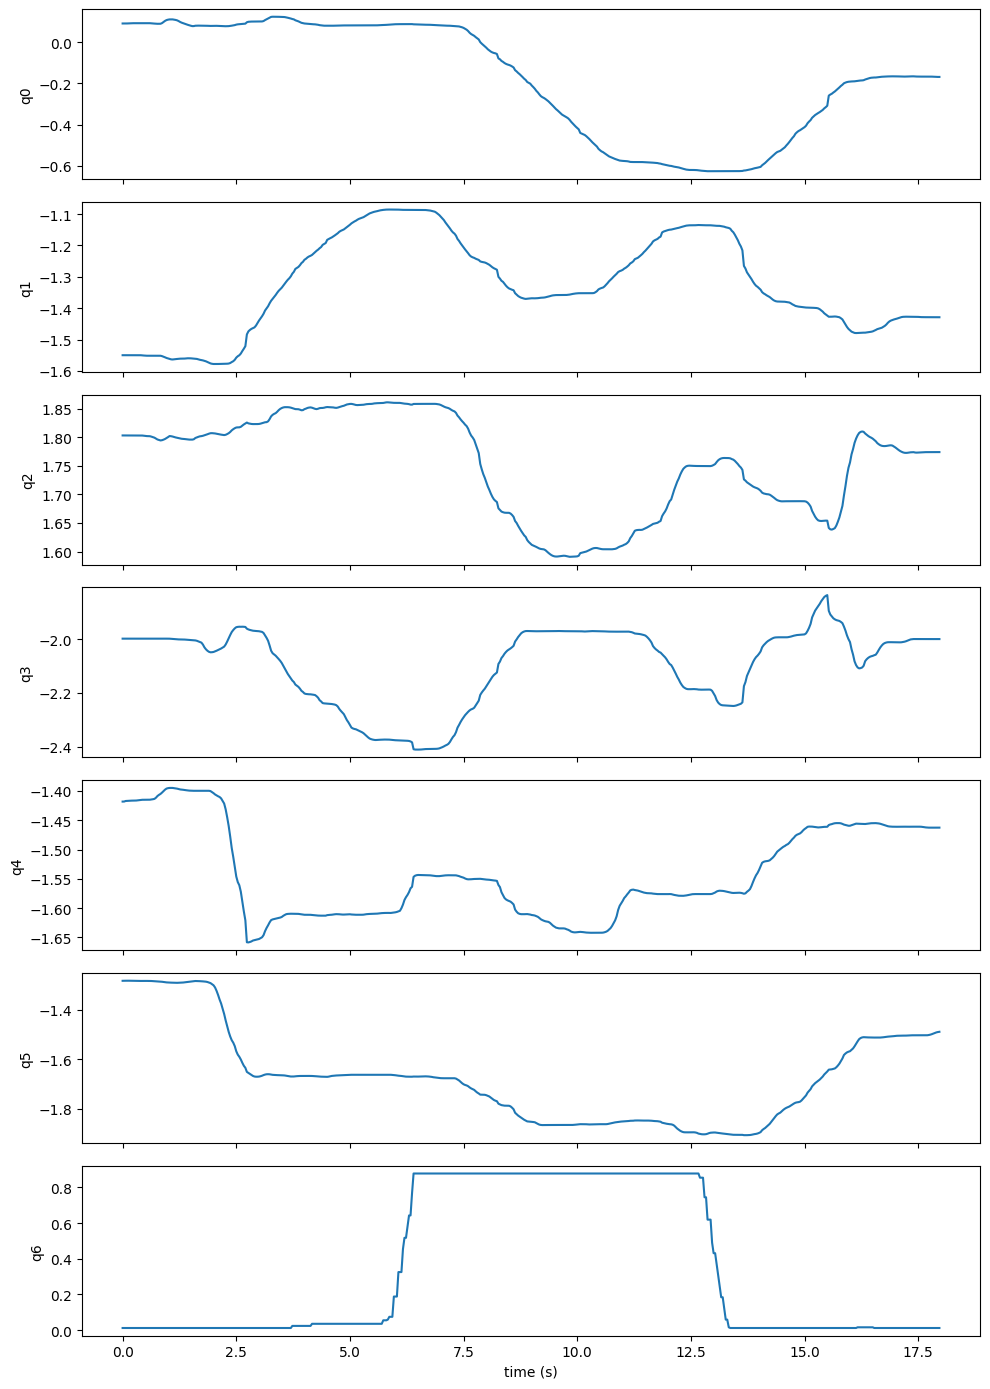

In [64]:
t = df["timestamp"].to_numpy()

fig, axs = plt.subplots(obs_df.shape[1], 1, sharex=True, figsize=(10, 2*obs_df.shape[1]))
for i, col in enumerate(obs_df.columns):
    axs[i].plot(t, obs_df[col].to_numpy())
    axs[i].set_ylabel(col)
axs[-1].set_xlabel("time (s)")
plt.tight_layout()
plt.show()

## Now the same for action

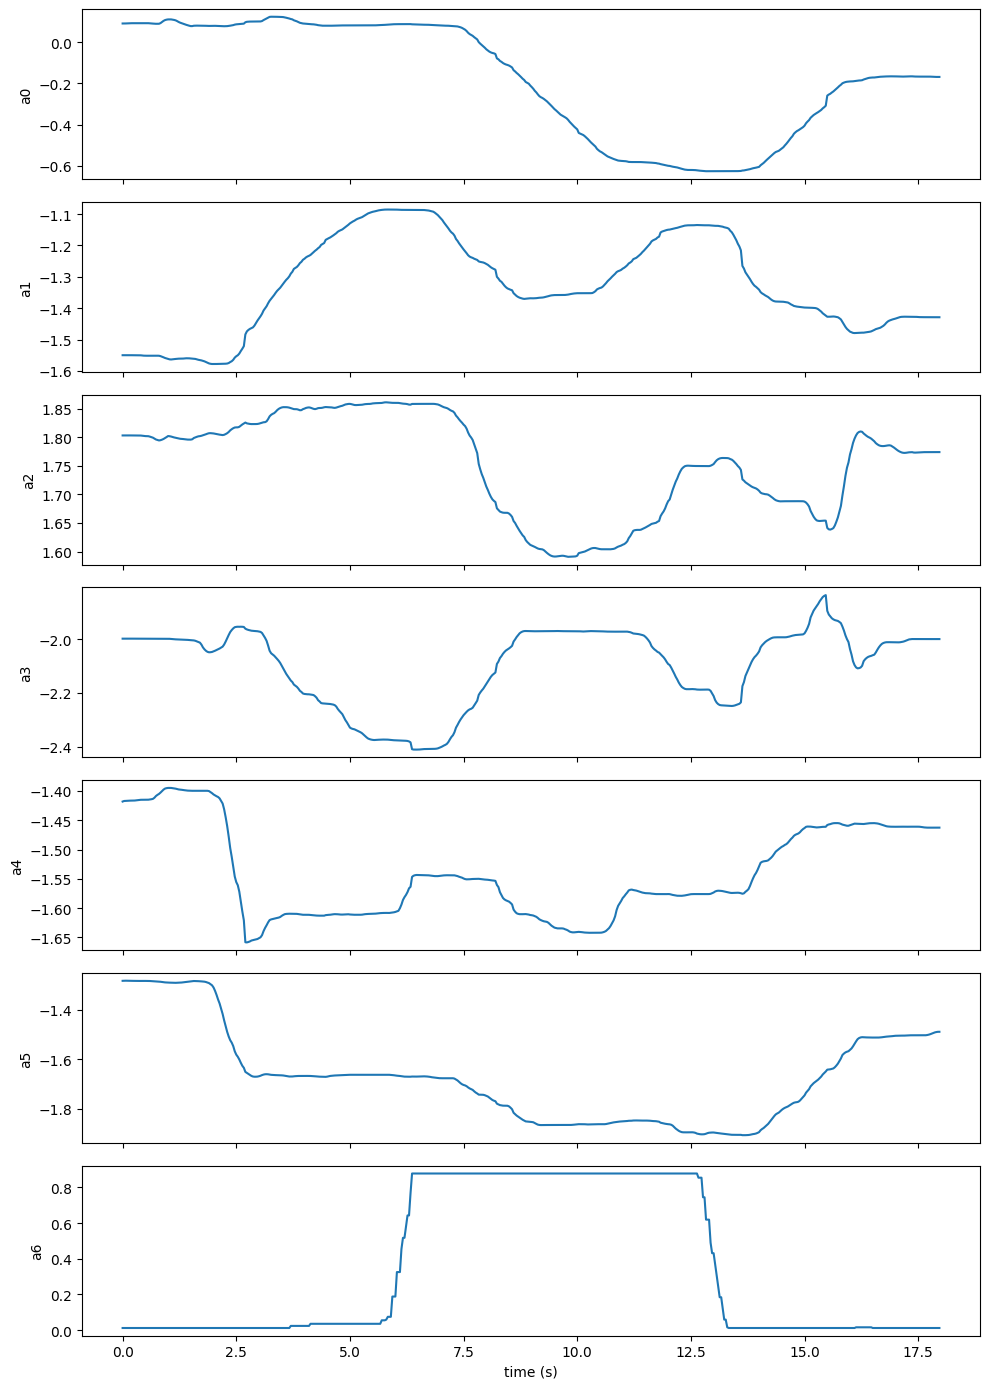

In [65]:
action_df = df.loc[:, "action"]
action_df = pd.DataFrame(df["action"].tolist(), index=df.index)
action_df.columns = [f"a{i}" for i in range(action_df.shape[1])]



# Visualize each action as a function of time
fig, axs = plt.subplots(action_df.shape[1], 1, sharex=True, figsize=(10, 2*action_df.shape[1]))
for i, col in enumerate(action_df.columns):
    axs[i].plot(t, action_df[col].to_numpy())
    axs[i].set_ylabel(col)
axs[-1].set_xlabel("time (s)")
plt.tight_layout()
plt.show()

In [66]:
## For each timestep, get the difference between the action and the observation.state
diff_df = action_df - obs_df
print(diff_df.head())

   a0  a1  a2  a3  a4  a5  a6  q0  q1  q2  q3  q4  q5  q6
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
